In [20]:
import pandas as pd


df = pd.read_csv("Iris.csv")


df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Drop ID column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Check structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:

df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


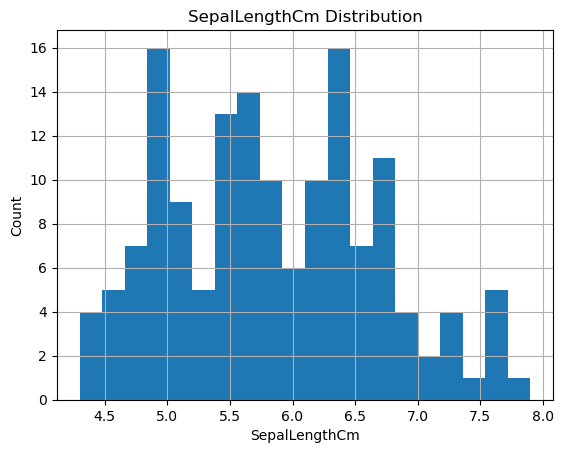

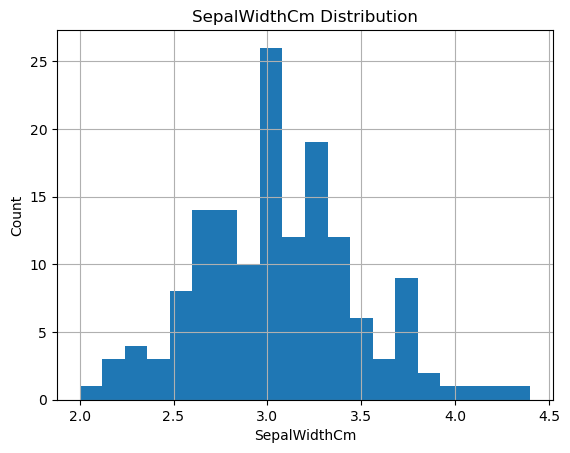

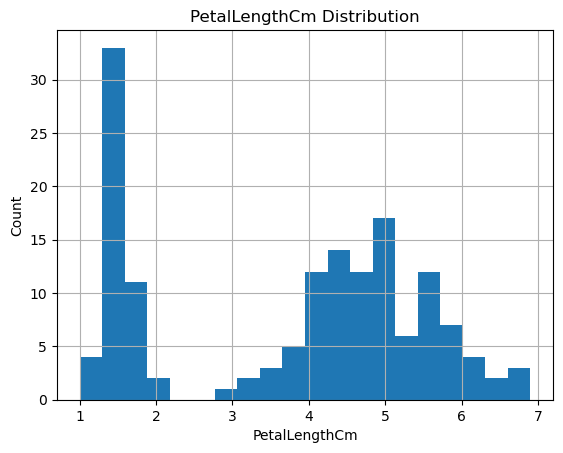

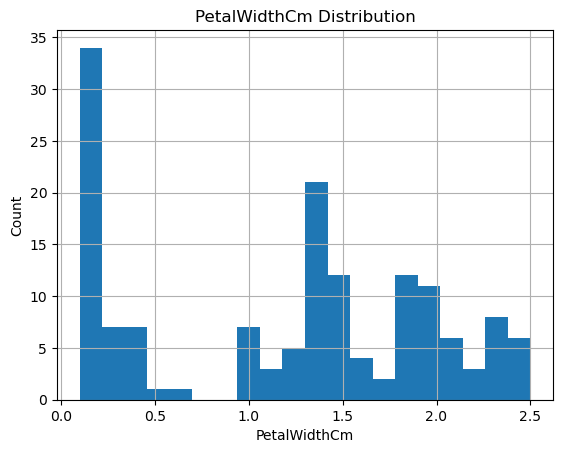

In [23]:
import matplotlib.pyplot as plt

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in features:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


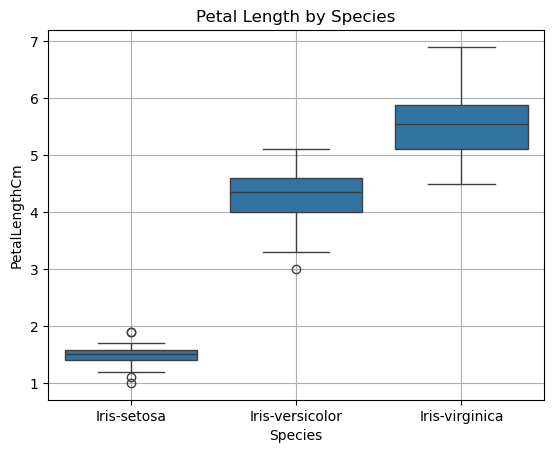

In [24]:
import seaborn as sns

plt.figure()
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Petal Length by Species")
plt.grid(True)
plt.show()


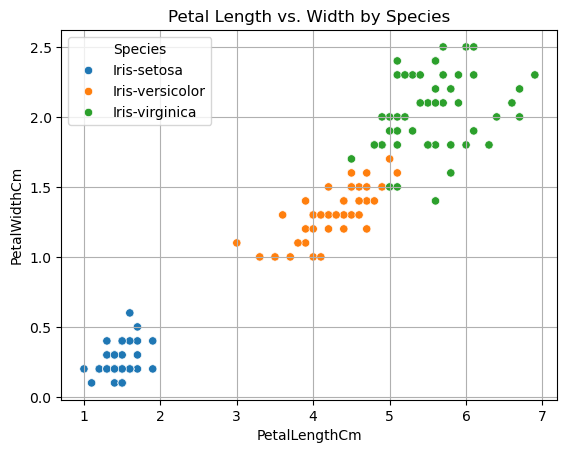

In [25]:
plt.figure()
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Petal Length vs. Width by Species")
plt.grid(True)
plt.show()


In [26]:
X = df.drop('Species', axis=1)
y = df['Species']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [29]:

acc_7 = knn_7.score(X_test, y_test)
print("Accuracy with k=7:", acc_7)


knn_5 = KNeighborsClassifier()
knn_5.fit(X_train, y_train)
acc_5 = knn_5.score(X_test, y_test)
print("Accuracy with k=5:", acc_5)


Accuracy with k=7: 0.9666666666666667
Accuracy with k=5: 1.0


In [30]:
new_samples = pd.DataFrame([
    [5, 3.2, 4.8, 1.3],
    [6, 3.8, 4.0, 2.0]
], columns=X.columns)

predictions = knn_7.predict(new_samples)
print("Predicted species (k=7):", predictions)


Predicted species (k=7): ['Iris-versicolor' 'Iris-versicolor']


In [32]:
from sklearn.model_selection import cross_val_score


cv_scores_7 = cross_val_score(knn_7, X, y, cv=10)
print("10-Fold CV Accuracy Scores (k=7):", cv_scores_7)
print("Average CV Accuracy (k=7):", cv_scores_7.mean())


cv_scores_5 = cross_val_score(knn_5, X, y, cv=10)
print("10-Fold CV Accuracy Scores (k=5):", cv_scores_5)
print("Average CV Accuracy (k=5):", cv_scores_5.mean())

10-Fold CV Accuracy Scores (k=7): [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Average CV Accuracy (k=7): 0.9666666666666668
10-Fold CV Accuracy Scores (k=5): [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Average CV Accuracy (k=5): 0.9666666666666668
